### Tahriou Samira
## Logistic regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [2]:
#data inladen
raw_data=pd.read_csv('data/survey lung cancer.csv')
raw_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
raw_data.shape #aantal rijen & kolommen

(309, 16)

In [4]:
raw_data.info() #kolomnamen, kolomtypes, aantal not null waardes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
raw_data.describe(include='all').T #samenvatting: counts, unique waardes, gemiddelde ...

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
GENDER,309,2,M,162,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,309.0,NaN,NaN,NaN,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,NaN,NaN,NaN,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,NaN,NaN,NaN,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,NaN,NaN,NaN,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,NaN,NaN,NaN,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,NaN,NaN,NaN,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,NaN,NaN,NaN,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,NaN,NaN,NaN,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,NaN,NaN,NaN,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


In [6]:
raw_data.isnull().sum() #nullwaardes

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [7]:
raw_data.duplicated().sum() #aantal duplicaten

33

In [8]:
duplicated_data = raw_data[raw_data.duplicated(keep=False)] 
duplicated_data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
13,M,58,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
23,M,60,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
51,M,63,2,2,2,1,2,2,2,2,1,1,2,1,1,YES
75,M,58,2,1,1,1,1,1,2,2,2,2,1,1,1,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [9]:
data_zonder_dupl = raw_data.drop_duplicates() #duplicaten verwijderen


In [10]:
data_zonder_dupl.duplicated().sum() #checken of er uiteindelijk nog duplicaten zijn

0

In [11]:
data_zonder_dupl.shape #aantal rijen en kolommen 309 - 33= 276 rijen, controleren:

(276, 16)

In [12]:
data_zonder_dupl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            276 n

In [13]:
data_zonder_dupl.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
GENDER,276,2,M,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,276.0,NaN,NaN,NaN,62.90942,8.379355,21.0,57.75,62.5,69.0,87.0
SMOKING,276.0,NaN,NaN,NaN,1.543478,0.499011,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,276.0,NaN,NaN,NaN,1.576087,0.495075,1.0,1.0,2.0,2.0,2.0
ANXIETY,276.0,NaN,NaN,NaN,1.496377,0.500895,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,276.0,NaN,NaN,NaN,1.507246,0.500856,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,276.0,NaN,NaN,NaN,1.521739,0.500435,1.0,1.0,2.0,2.0,2.0
FATIGUE,276.0,NaN,NaN,NaN,1.663043,0.473529,1.0,1.0,2.0,2.0,2.0
ALLERGY,276.0,NaN,NaN,NaN,1.547101,0.498681,1.0,1.0,2.0,2.0,2.0
WHEEZING,276.0,NaN,NaN,NaN,1.547101,0.498681,1.0,1.0,2.0,2.0,2.0


In [14]:
#Sweetviz Profiler
import sweetviz as sv
report = sv.analyze(data_zonder_dupl)
report.show_html("report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [15]:
# numerical_data = cleaned_data.drop(columns=['GENDER', 'LUNG_CANCER'])
# catyegorical_data=cleaned_data[['GENDER', 'LUNG_CANCER']]

In [16]:
data_zonder_dupl.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [17]:
LungCancerData=data_zonder_dupl.copy()
LungCancerData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            276 n

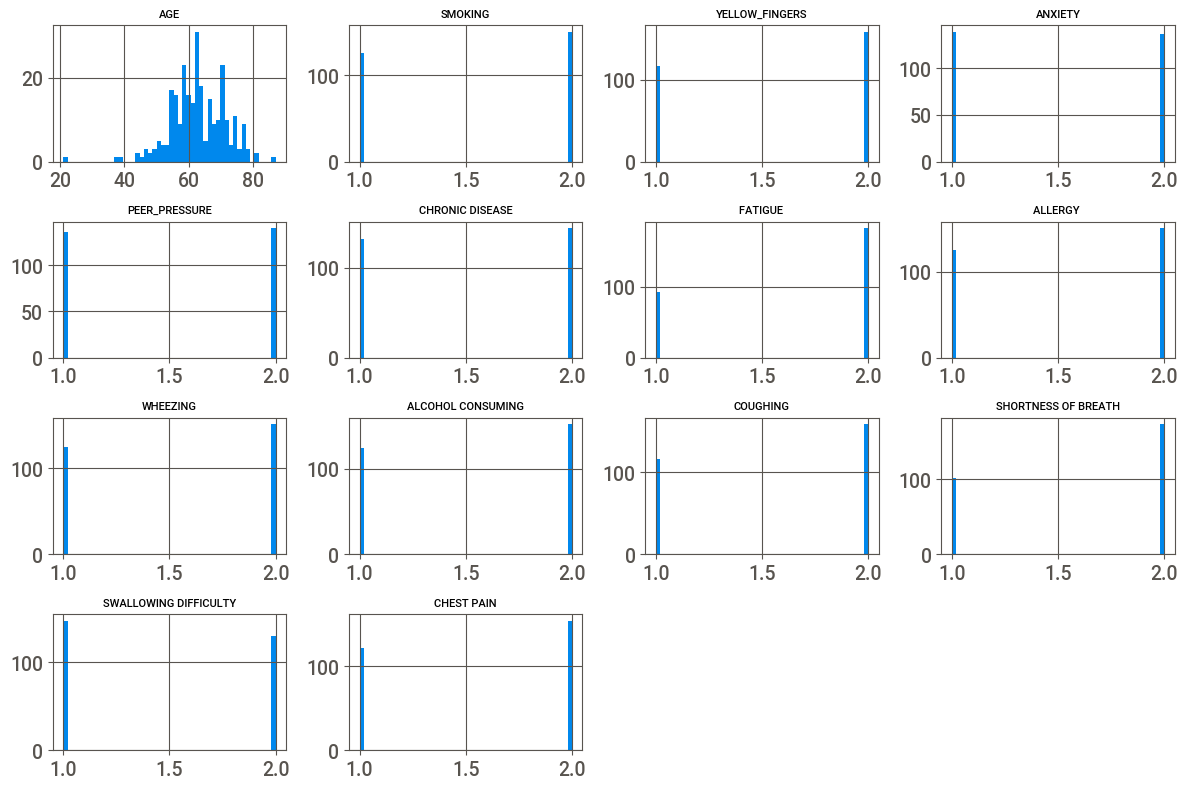

In [18]:
plt.rc('font', size=10)
plt.rc('axes', labelsize=14, titlesize=8)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

LungCancerData.hist(bins=50, figsize=(12, 8))
plt.tight_layout()
plt.show()

In [19]:
LungCancerData['LUNG_CANCER'] = LungCancerData['LUNG_CANCER'].map({'YES': 1, 'NO': 0}).astype(int)  # 'LUNG_CANCER' omzetten naar 0 en 1

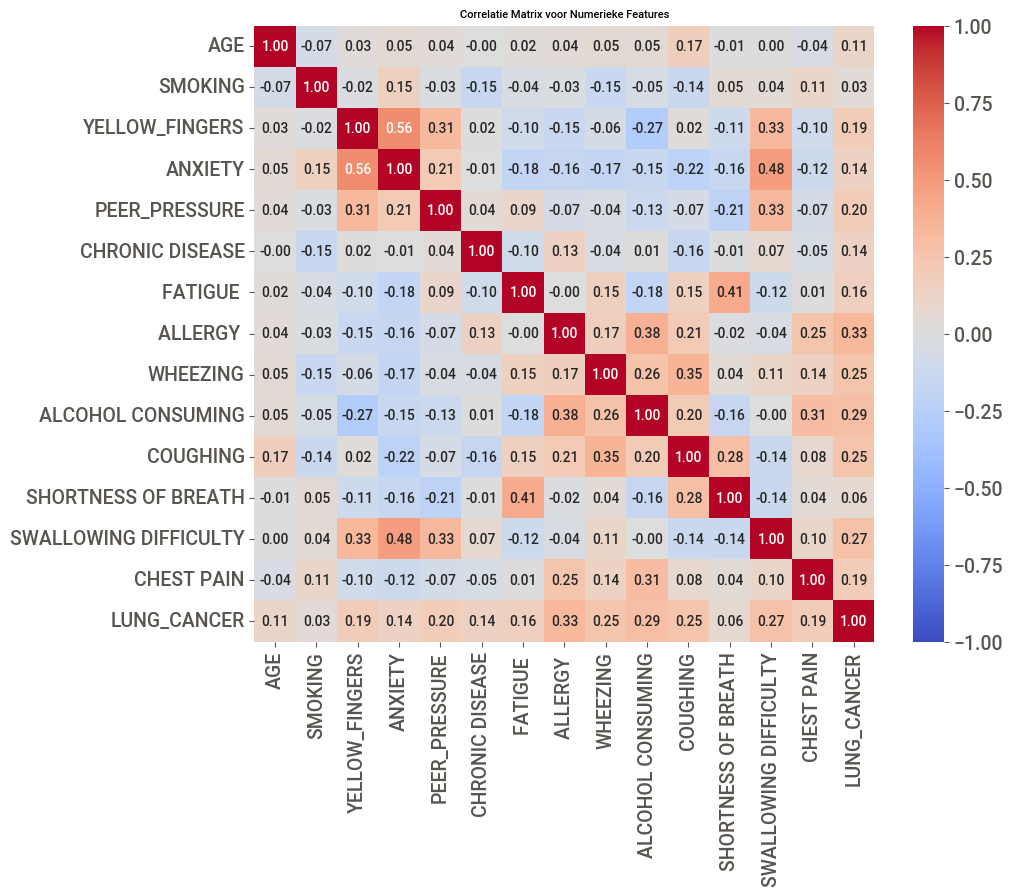

In [20]:
 #  Correlation Matrix voor numerieke features
LungCancerData_num=LungCancerData.drop(columns=['GENDER'])
correlation_matrix = LungCancerData_num.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlatie Matrix voor Numerieke Features')
plt.show()

Text(0, 0.5, 'Longkanker')

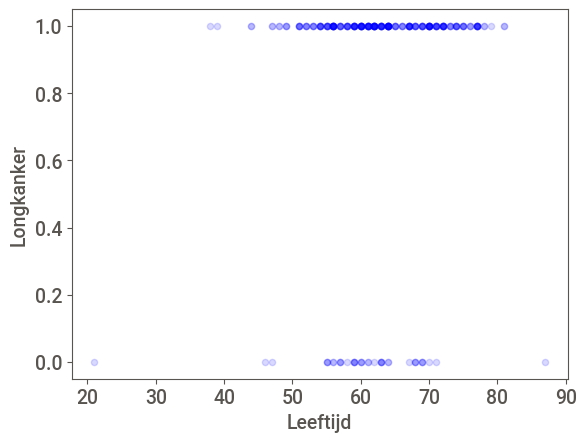

In [21]:
# Scatterplot: de relatie tussen AGE en LUNG_CANCER:

fig, ax = plt.subplots()

LungCancerData.plot.scatter(x = 'AGE', 
                    y = 'LUNG_CANCER', 
                    color = 'blue',
                    alpha = 0.15,
                    ax = ax)

ax.set_xlabel("Leeftijd")
ax.set_ylabel("Longkanker")

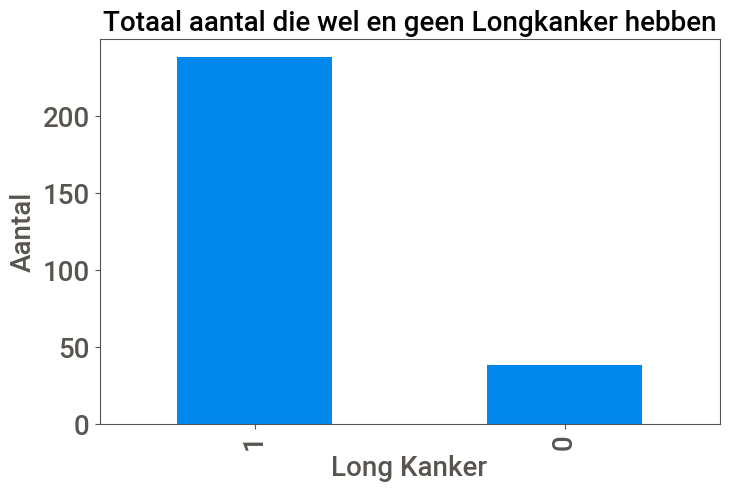

In [22]:
# Staafdiagram die het aantal mensen toont die wel of geen longkanker hebben in de dataset (TARGET).
plt.figure(figsize = (8,5))
plt.title("Totaal aantal die wel en geen Longkanker hebben",fontsize=20)
LungCancerData["LUNG_CANCER"].value_counts().plot(kind= 'bar',fontsize=20)
plt.xlabel("Long Kanker", fontsize=20)
plt.ylabel("Aantal",fontsize=20)
plt.show()

In [23]:
# normalize=True om proporties te zien proporties in plaats van absolute aantallen:
LongKanker_valuecounts = LungCancerData['LUNG_CANCER'].value_counts(normalize=True)
print(LongKanker_valuecounts)

LUNG_CANCER
1    0.862319
0    0.137681
Name: proportion, dtype: float64


In [ ]:
# De verhouding is 86,23% Ywaardes met 1 (yes cancer) vs. 13,76% Ywaardes met 0 (no cancer) => de dataset is sterk onbalanced.
# M.a.w. het model kan een nauwkeurigheid van 86% kan behalen door altijd LUNG_CANCER = 1 te voorspellen. 

    # Bij onbalanced data is accuracy (nauwkeurigheid) vaak misleidend. Om die reden gebruik ik de metrieken:
    # Precision: hoeveel van de voorspelde positieven zijn daadwerkelijk positief?
    # Recall: hoeveel van de werkelijke positieven zijn correct voorspeld
    # F1-score: gemiddelde van precision en recall.

Text(0.5, 1.0, 'Age distributie')

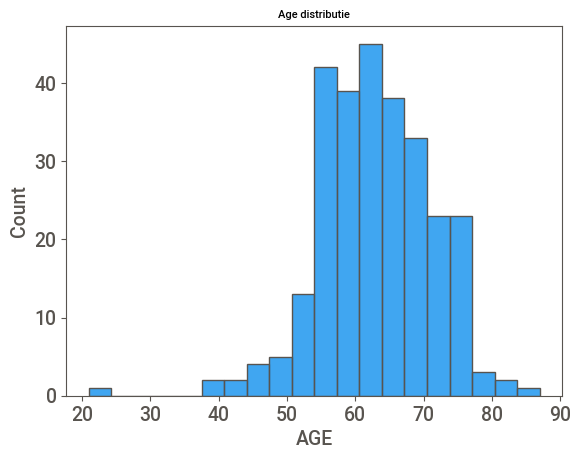

In [25]:
# Age distributie
sns.histplot(x='AGE',data=LungCancerData)
plt.title('Age distributie')

In [ ]:
#Als ik mijn outliers leeftijd <30 verwijder: dan zie ik dat de resultaten iets minder zijn dan nu het geval is
# num_date_gr_30 = LungCancerData.loc[LungCancerData["AGE"] >= 30]

# Gemiddelde F1-score: 0.92
# Gemiddelde Precisie: 0.96
# Gemiddelde Recall: 0.88
# Gemiddelde ROC AUC-score: 0.94

# Classification Report (over alle folds):
#               precision    recall  f1-score   support

#            0       0.49      0.76      0.60        37
#            1       0.96      0.88      0.92       238

#     accuracy                           0.86       275
#    macro avg       0.72      0.82      0.76       275
# weighted avg       0.90      0.86      0.87       275

# Ook als ik AGE splits in leeftijdsgroepen was iets minder


In [28]:
# X=LungCancerData.drop('LUNG_CANCER',axis=1)
# #X=num_date_gr_30.drop(['LUNG_CANCER'],axis=1) #indien ik leeftijd <30 verwijdert heb
# y=LungCancerData['LUNG_CANCER']
# # y=num_date_gr_30['LUNG_CANCER']

# Data voorbereiden
X = LungCancerData.drop('LUNG_CANCER', axis=1)
y = LungCancerData['LUNG_CANCER'] #.map({'YES': 1, 'NO': 0}).astype(int)  # 'LUNG_CANCER' omzetten naar 0 en 1

In [29]:
X['AGE'].skew() 

-0.45590088363012093

In [30]:
X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1


In [31]:
#Age distributie na het verwijderen van de leeftijd <30j
#  sns.histplot(x='AGE',data=X)
# plt.title('Age Distributie na het verwijderen van leeftijd <30')

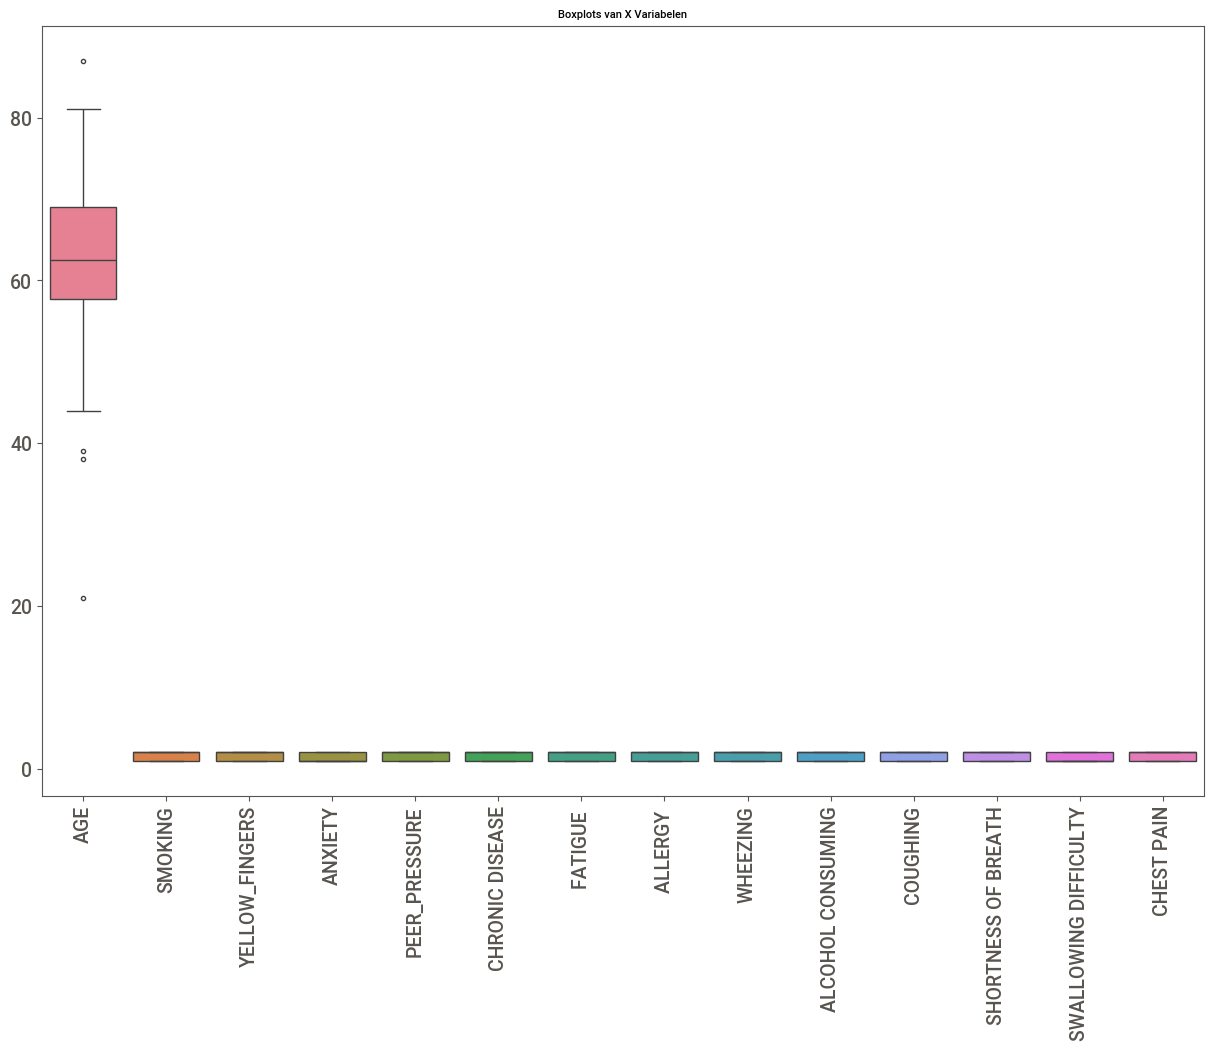

In [32]:
# # Boxplot van de X variabelen
plt.figure(figsize=(15, 10))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.title('Boxplots van X Variabelen')
plt.show()

In [33]:
scale = StandardScaler()
# X wordt X_scaled
X_scaled = X.copy()  

# StandardScaler op de kolom Age:
X_scaled['AGE'] = scale.fit_transform(X[['AGE']])


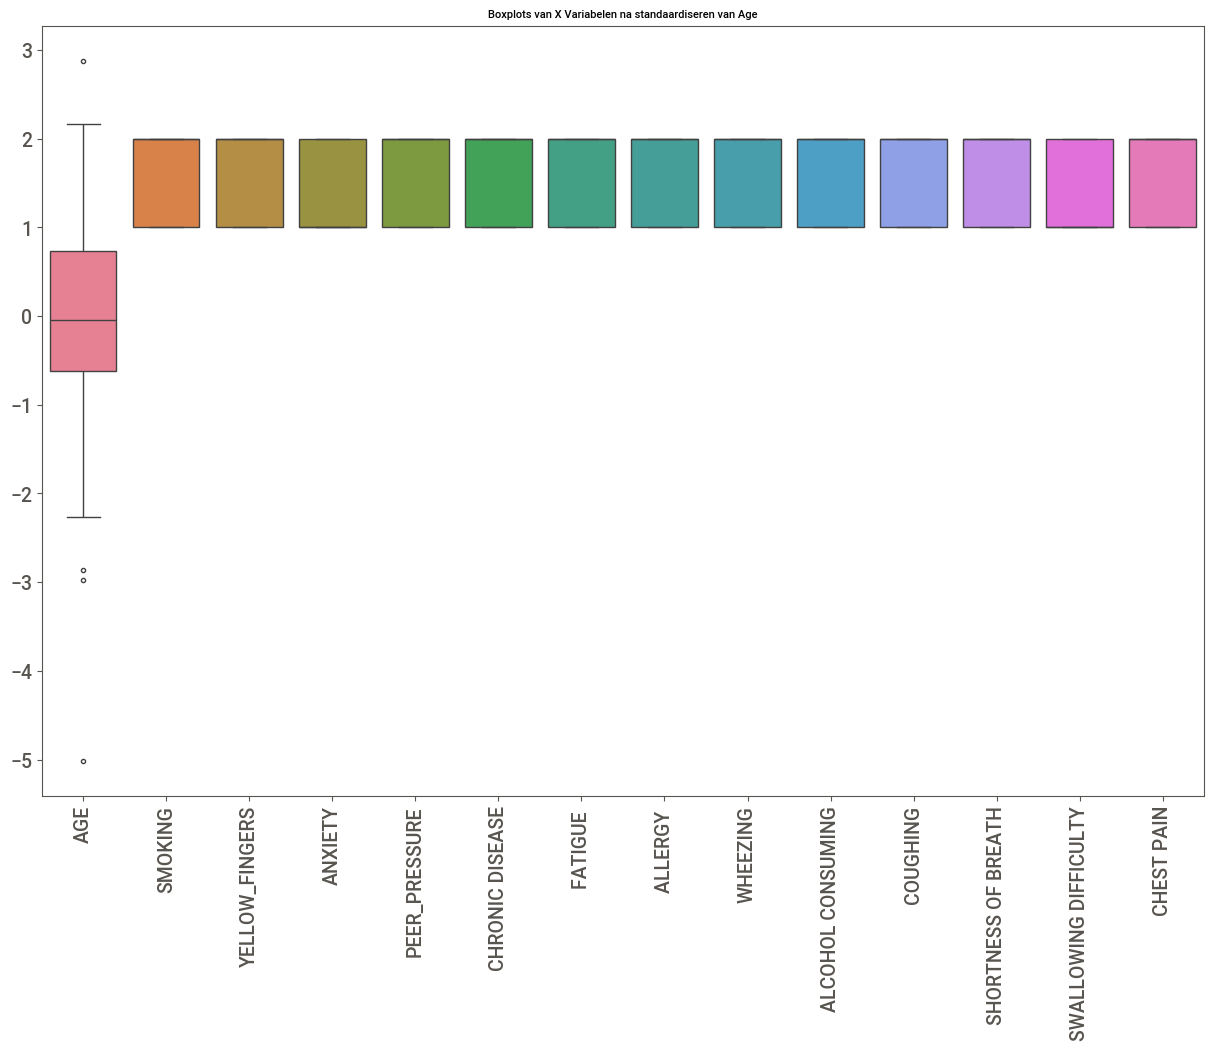

In [34]:
# #Na het standaardiseren van Age:

plt.figure(figsize=(15, 10))
sns.boxplot(data=X_scaled)
plt.xticks(rotation=90)
plt.title('Boxplots van X Variabelen na standaardiseren van Age')
plt.show()

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Zonder_AGE = [col for col in X.columns if col != 'AGE']

preprocessor = ColumnTransformer([
    ('scaler', StandardScaler(), ['AGE']),  
    ('encoder', OrdinalEncoder(),Zonder_AGE), 
], remainder='passthrough')

pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(class_weight="balanced", random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.875
              precision    recall  f1-score   support

           0       0.53      1.00      0.70         8
           1       1.00      0.85      0.92        48

    accuracy                           0.88        56
   macro avg       0.77      0.93      0.81        56
weighted avg       0.93      0.88      0.89        56



In [ ]:
#Indien ik de leeftijd <30 (outlier) verwijder, zijn mijn resulaten minder goed:
# Gemiddelde F1-score: 0.92
# Gemiddelde Precisie: 0.96
# Gemiddelde Recall: 0.88
# Gemiddelde ROC AUC-score: 0.94

# Classification Report (over alle folds):
#               precision    recall  f1-score   support

#            0       0.49      0.76      0.60        37
#            1       0.96      0.88      0.92       238

#     accuracy                           0.86       275
#    macro avg       0.72      0.82      0.76       275
# weighted avg       0.90      0.86      0.87       275

In [ ]:
# In het orginele bestand is de score op accurary (LogRegr model):
# accuracy after train model : 93.18181818181817
# accuracy after test  model : 92.85714285714286
#   maar voor een unbalanced target is accuracy geen betrouwbare maatstaf dus:
# de orginele:
# Classification Report:
#                precision    recall  f1-score   support

#       Benign       1.00      0.67      0.80        12
#    Malignant       0.92      1.00      0.96        44

#     accuracy                           0.93        56
#    macro avg       0.96      0.83      0.88        56
# weighted avg       0.93      0.93      0.92        56